# Project3: Finance historical stock data

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
            
#do all our graphics inline
%matplotlib inline 

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

import fix_yahoo_finance
fix_yahoo_finance.pdr_override()

/Users/mandy/anaconda3/lib/python3.6/site-packages/fix_yahoo_finance-0.0.19-py3.6.egg/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.


## Obtaining historical stock and index data
### Fetching stock data from yahoo

In [8]:
''' request the previous three years of data for MSFT 2012 through 2014'''
'''pandas_datareader may need to install fix_yahoo_finance and import it'''

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 1, 1)
from pandas_datareader import data, wb
msft = data.DataReader('MSFT','yahoo', start, end)
msft[:5]

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2012-01-03  26.55  26.96  26.39  26.77     22.910  64731500
2012-01-04  26.82  27.47  26.78  27.40     23.449  80516100
2012-01-05  27.38  27.73  27.29  27.68     23.689  56081400
2012-01-06  27.53  28.19  27.53  28.11     24.057  99455500
2012-01-09  28.05  28.10  27.72  27.74     23.740  59706800

#### map function
1 The map function is the simplest one among Python built-ins used for functional programming. These tools apply functions to sequences and other iterables. The filter filters out items based on a test function which is a filter and apply functions to pairs of item and running result which is reduce.
1 map(function, sequence) ：对sequence中的item依次执行function(item)，见执行结果组成一个List返回; map也支持多个sequence，这就要求function也支持相应数量的参数输入：> def add(x, y): return x+y    > map(add, range(8), range(8)) 
output: [0, 2, 4, 6, 8, 10, 12, 14]

2 concat函数是在pandas底下的方法，可以将数据根据不同的轴作简单的融合
  pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False)
  objs: series，dataframe或者是panel构成的序列list; axis:需要合并链接的轴，0是行，1是列; 要在相接的时候在加上一个层次的key来识别数据源自于哪张表，可以增加keys参数





In [10]:
''' retrive the historical prices for a list of stocks'''
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime.now() - datetime.timedelta(days=1)   # yesterday

def get(tickers, st, en):
    def getData(ticker):
        return data.DataReader(ticker, 'yahoo', start, end)
    
    datas = map(getData, tickers)
    return pd.concat(datas, keys = tickers, names = ['Ticker'])

# get data for the following stocks
tickers = ['AAPL', 'MSFT','IBM', 'GE','DAL','UAL', 'PEP', 'KO']
#tickers = ['AAPL', 'MSFT']
all_data = get(tickers, start, end)
all_data[-5:] 

                    Open   High    Low  Close  Adj Close    Volume
Ticker Date                                                       
KO     2017-10-12  45.98  46.14  45.94  46.11      46.11   7710200
       2017-10-13  46.25  46.38  46.15  46.18      46.18   7126000
       2017-10-16  46.12  46.75  46.10  46.62      46.62  12708600
       2017-10-17  46.53  46.63  46.31  46.52      46.52   7699400
       2017-10-18  46.41  46.54  46.24  46.40      46.40   6157700

## Visualizing financial time series data
### Plotting closing prices

In [18]:
just_closing = all_data[['Adj Close']].reset_index()
just_closing[:5]

  Ticker       Date  Adj Close
0   AAPL 2016-01-04    101.791
1   AAPL 2016-01-05     99.240
2   AAPL 2016-01-06     97.298
3   AAPL 2016-01-07     93.191
4   AAPL 2016-01-08     93.684

In [19]:
''' DataFrame.pivot(index=None, columns=None, values=None)'''
# pivot date to the index, ticker values to columns
daily_close_px = just_closing.pivot(index = 'Date', columns = 'Ticker', values = 'Adj Close')
daily_close_px[:5]

Ticker         AAPL     DAL      GE  ...      MSFT     PEP    UAL
Date                                 ...                         
2016-01-04  101.791  47.175  29.006  ...    52.434  93.984  55.61
2016-01-05   99.240  47.088  29.035  ...    52.673  94.631  55.06
2016-01-06   97.298  47.437  28.572  ...    51.716  94.659  55.20
2016-01-07   93.191  45.566  27.363  ...    49.917  92.842  52.63
2016-01-08   93.684  45.188  26.872  ...    50.070  92.499  51.89

[5 rows x 8 columns]

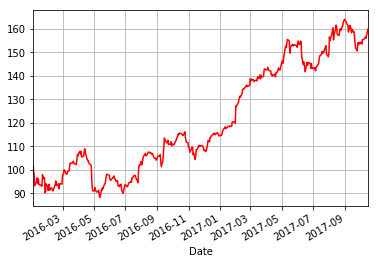

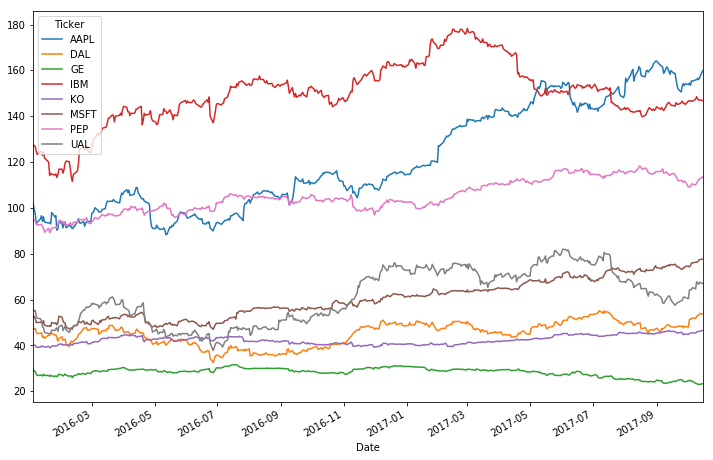

In [78]:
# plot AAPL
_ = daily_close_px['AAPL'].plot(color = 'r')
plt.grid()
#plt.savefig('AAPL closing prices.png', bbox_inches = 'tight', dpi = 300)
# plot all the stocks closing prices against each other
_ = daily_close_px.plot(figsize = (12,8))
#plt.savefig('all closing prices.png', bbox_inches = 'tight', dpi = 300)

### Ploting volumes series data  （volume: 交易量）

Date
2016-01-04    53778000
2016-01-05    34079700
2016-01-06    39518900
2016-01-07    56564900
2016-01-08    48754000
                ...   
2017-10-10    13944500
2017-10-11    15388900
2017-10-12    16876500
2017-10-13    15335700
2017-10-16    12356100
Name: Volume, Length: 451, dtype: int64


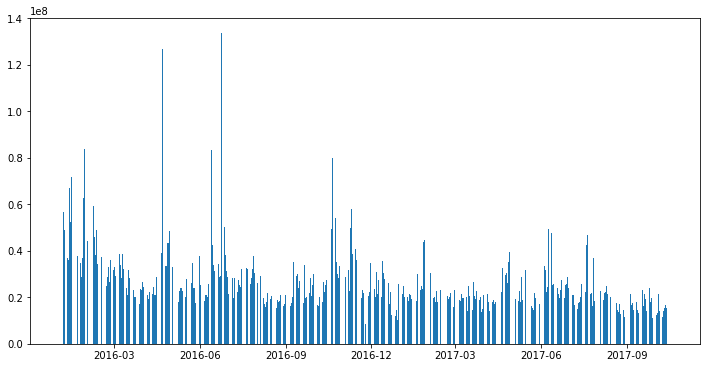

In [21]:
# get the daily volumes for msft
msftV = all_data.loc['MSFT', 'Volume']
print(msftV)
# matplotlib.pyplot: bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
plt.bar(msftV.index, msftV)
# set size
plt.gcf().set_size_inches(12,6)
#plt.savefig('msft volumes bar.png')

### Combined prices and volumes

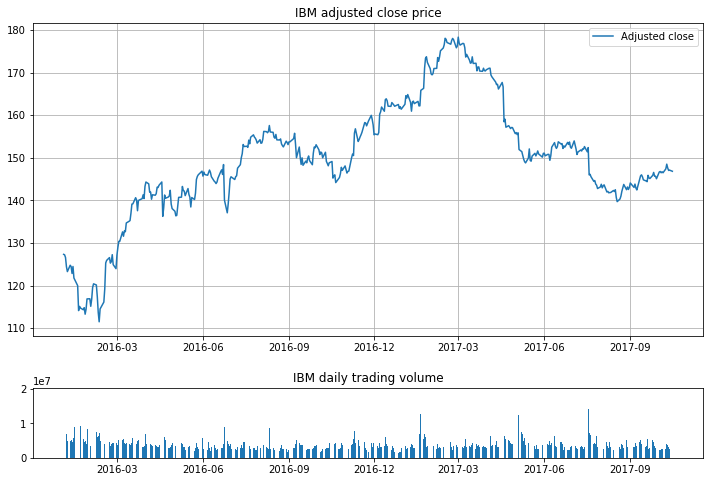

In [22]:
# draw a combined prices versus volumes graph
'''help plt.subplot2grid: 
https://morvanzhou.github.io/tutorials/data-manipulation/plt/4-2-subplot2/''' 
# 整个图分4行4列，这张top从（0，0）位置开始画，行跨度3，列跨度4
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(daily_close_px['IBM'], label = 'Adjusted close')
plt.legend(loc=1)   # label's location
plt.title('IBM adjusted close price')
plt.grid()
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ibmV = all_data.loc['IBM', 'Volume']
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(ibmV.index, ibmV)
plt.title('IBM daily trading volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)  # bottom图与上面的图之间的距离
#plt.savefig('price vs volume.png')


### plotting candlesticks
A candlestick chart is a style of financial chart used to describe price movements of a security, derivative, or currency. Each "candlestick" typically shows one day; so for example a one-month chart may show the 20 trading days as 20 "candlesticks". It is like a combination of line-chart and a bar-chart: each bar represents all four important pieces of information for that day: the open, the close, the high and the low. 
https://en.wikipedia.org/wiki/Candlestick_chart
https://baike.baidu.com/item/K%E7%BA%BF%E5%9B%BE/85028?fromtitle=%E8%9C%A1%E7%83%9B%E5%9B%BE&fromid=2797095


In [23]:
# subset to AAPL in dec 2016
subset = all_data.loc['AAPL'].loc['2016-12-1':'2016-12-31'].reset_index()
subset[:5]

        Date    Open    High    ...      Close  Adj Close    Volume
0 2016-12-01  110.37  110.94    ...     109.49    108.145  37086900
1 2016-12-02  109.17  110.09    ...     109.90    108.549  26528000
2 2016-12-05  110.00  110.03    ...     109.11    107.769  34324500
3 2016-12-06  109.50  110.36    ...     109.95    108.599  26195500
4 2016-12-07  109.26  111.19    ...     111.03    109.666  29998700

[5 rows x 7 columns]

In [24]:
''' convert dates matplotlib formatters representation  
DatetimeIndex.to_pydatetime(): Return DatetimeIndex as object ndarray of datetime.datetime objects'''
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date    Open    High    ...     Adj Close    Volume  date_num
0 2016-12-01  110.37  110.94    ...       108.145  37086900  736299.0
1 2016-12-02  109.17  110.09    ...       108.549  26528000  736300.0
2 2016-12-05  110.00  110.03    ...       107.769  34324500  736303.0
3 2016-12-06  109.50  110.36    ...       108.599  26195500  736304.0
4 2016-12-07  109.26  111.19    ...       109.666  29998700  736305.0

[5 rows x 8 columns]

In [25]:
# extract only values required as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num', 'Open', 'High', 'Low', 'Close']].values]
subset_as_tuples[:5]

[(736299.0, 110.370003, 110.94000200000001, 109.029999, 109.489998),
 (736300.0, 109.16999799999999, 110.089996, 108.849998, 109.900002),
 (736303.0, 110.0, 110.029999, 108.25, 109.110001),
 (736304.0, 109.5, 110.360001, 109.19000200000001, 109.949997),
 (736305.0, 109.260002, 111.19000200000001, 109.160004, 111.029999)]

In [26]:
# date formatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  #e.g., Jan 12, https://apidock.com/ruby/DateTime/strftime

# we want to only display labels for mondays
from matplotlib.dates import WeekdayLocator, MONDAY, DayLocator
mondays = WeekdayLocator(MONDAY)  # major ticks on mondays
alldays = DayLocator()

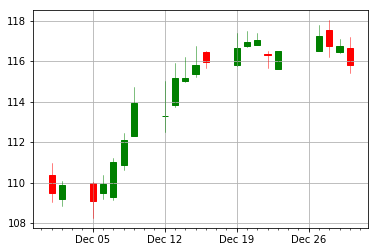

In [76]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
ax.xaxis.set_minor_locator(alldays)

# set x-axis text rotation
ax.xaxis_date()
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# draw candlesticks
from matplotlib.finance import candlestick_ohlc
candlestick_ohlc(ax, subset_as_tuples, width=0.6, colorup='g', colordown='r')
#plt.savefig('AAPL candlestick.png')
plt.grid() 

## Fundamental Financial Calculations

### Calculating daily percentage change

In [31]:
# calculate percentage change from day 0 to day 1
AAPL_t0 = daily_close_px.iloc[0]['AAPL']  # day 0 adj closing price
AAPL_t1 = daily_close_px.iloc[1]['AAPL']  # day 1
r_t1 = AAPL_t1/AAPL_t0-1  # returns
AAPL_t0, AAPL_t1, r_t1

(101.790649, 99.239844999999988, -0.025059315615523881)

In [52]:
'''apply this to everything '''
dpc_1 = daily_close_px.iloc[1:] / daily_close_px.iloc[:-1].values -1
'''daily_close_px.iloc[2:] / daily_close_px.iloc[:-2].values -1 即为从第三行开始除以该行前两行的数据
注意必须[2:] / [:-2]， [3:] / [:-3]这样成对出现'''
dpc_1

Ticker           AAPL        DAL         GE  ...         MSFT        PEP  \
Date                                         ...                           
2016-01-05 -2.506e-02 -1.850e-03  9.768e-04  ...    4.562e-03  6.885e-03   
2016-01-06 -1.957e-02  7.412e-03 -1.594e-02  ...   -1.817e-02  3.018e-04   
2016-01-07 -4.220e-02 -3.944e-02 -4.231e-02  ...   -3.478e-02 -1.920e-02   
2016-01-08  5.288e-03 -8.298e-03 -1.795e-02  ...    3.067e-03 -3.690e-03   
2016-01-11  1.619e-02  2.789e-03  4.569e-03  ...   -5.734e-04  2.366e-03   
...               ...        ...        ...  ...          ...        ...   
2017-10-10  3.850e-04  1.855e-02 -2.988e-03  ...    0.000e+00  6.999e-03   
2017-10-11  4.169e-03  7.021e-03 -1.241e-02  ...    1.704e-03  6.590e-03   
2017-10-12 -3.513e-03  7.537e-04 -8.670e-04  ...    9.160e-03  8.430e-03   
2017-10-13  6.346e-03  1.600e-02 -3.037e-03  ...    4.798e-03  1.512e-03   
2017-10-16  1.841e-02 -6.301e-03  1.654e-02  ...    2.065e-03  8.435e-03   

Ticker     

In [56]:
# show the DataFrame that is the numerator, 
_ = daily_close_px.iloc[1:]
# the numerator is a 2-d array, but excludes the last day
daily_close_px.iloc[:-1].values

array([[ 101.790649,   47.175491,   29.006168, ...,   52.433533,
          93.98365 ,   55.610001],
       [  99.239845,   47.088234,   29.034502, ...,   52.672737,
          94.630692,   55.060001],
       [  97.29776 ,   47.437256,   28.571693, ...,   51.715916,
          94.659248,   55.200001],
       ..., 
       [ 156.550003,   53.07    ,   23.07    , ...,   76.419998,
         111.510002,   67.400002],
       [ 156.      ,   53.110001,   23.049999, ...,   77.120003,
         112.449997,   66.639999],
       [ 156.990005,   53.959999,   22.98    , ...,   77.489998,
         112.620003,   67.57    ]])

In [68]:
'''or using the shift function'''
dpc_2 = daily_close_px/daily_close_px.shift(1)-1  # .shift(2)后面的除前两行 .shift(-1)前一行除后一行，最后一行不能计算数据
dpc_2

Ticker           AAPL        DAL         GE  ...     MSFT        PEP    UAL
Date                                         ...                           
2016-01-04        NaN        NaN        NaN  ...      NaN        NaN    NaN
2016-01-05 -2.506e-02 -1.850e-03  9.768e-04  ...    0.005  6.885e-03 -0.010
2016-01-06 -1.957e-02  7.412e-03 -1.594e-02  ...   -0.018  3.018e-04  0.003
2016-01-07 -4.220e-02 -3.944e-02 -4.231e-02  ...   -0.035 -1.920e-02 -0.047
2016-01-08  5.288e-03 -8.298e-03 -1.795e-02  ...    0.003 -3.690e-03 -0.014
...               ...        ...        ...  ...      ...        ...    ...
2017-10-10  3.850e-04  1.855e-02 -2.988e-03  ...    0.000  6.999e-03  0.047
2017-10-11  4.169e-03  7.021e-03 -1.241e-02  ...    0.002  6.590e-03 -0.005
2017-10-12 -3.513e-03  7.537e-04 -8.670e-04  ...    0.009  8.430e-03 -0.011
2017-10-13  6.346e-03  1.600e-02 -3.037e-03  ...    0.005  1.512e-03  0.014
2017-10-16  1.841e-02 -6.301e-03  1.654e-02  ...    0.002  8.435e-03 -0.009

[451 rows x

#### to make it easy, pandas has .pct_change() 

In [72]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.fillna(0, inplace=True)  # fill NaN
daily_pct_change[:5]

Ticker       AAPL    DAL         GE  ...     MSFT        PEP    UAL
Date                                 ...                           
2016-01-04  0.000  0.000  0.000e+00  ...    0.000  0.000e+00  0.000
2016-01-05 -0.025 -0.002  9.768e-04  ...    0.005  6.885e-03 -0.010
2016-01-06 -0.020  0.007 -1.594e-02  ...   -0.018  3.018e-04  0.003
2016-01-07 -0.042 -0.039 -4.231e-02  ...   -0.035 -1.920e-02 -0.047
2016-01-08  0.005 -0.008 -1.795e-02  ...    0.003 -3.690e-03 -0.014

[5 rows x 8 columns]

### Calculating simple daily cumulative returns

In [73]:
# calculate the cumulative daily returns, 以day0 20160104的价格为基准计算
cum_daily_return = (1+daily_pct_change).cumprod()
cum_daily_return

Ticker       AAPL    DAL     GE  ...     MSFT    PEP    UAL
Date                             ...                       
2016-01-04  1.000  1.000  1.000  ...    1.000  1.000  1.000
2016-01-05  0.975  0.998  1.001  ...    1.005  1.007  0.990
2016-01-06  0.956  1.006  0.985  ...    0.986  1.007  0.993
2016-01-07  0.916  0.966  0.943  ...    0.952  0.988  0.946
2016-01-08  0.920  0.958  0.926  ...    0.955  0.984  0.933
...           ...    ...    ...  ...      ...    ...    ...
2017-10-10  1.532  1.117  0.805  ...    1.455  1.179  1.218
2017-10-11  1.538  1.125  0.795  ...    1.457  1.186  1.212
2017-10-12  1.533  1.126  0.795  ...    1.471  1.196  1.198
2017-10-13  1.542  1.144  0.792  ...    1.478  1.198  1.215
2017-10-16  1.571  1.137  0.805  ...    1.481  1.208  1.204

[451 rows x 8 columns]

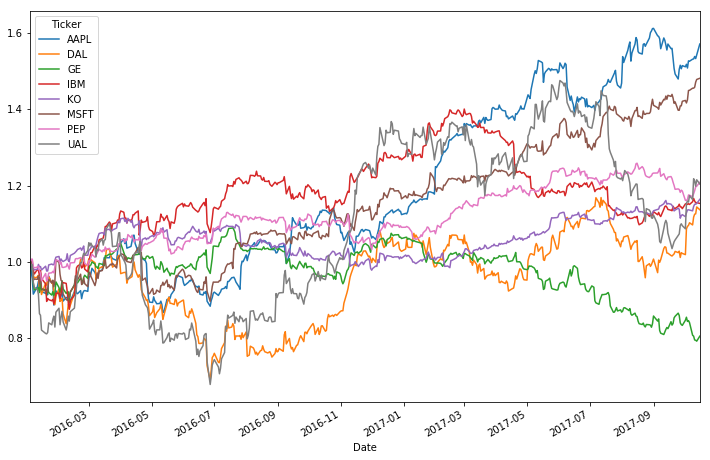

In [77]:
# plot all the cumulative returns
cum_daily_return.plot(figsize=(12,8))
#plt.savefig('cumulative returns.png', dpi=300)

### Analyzing distribution of returns

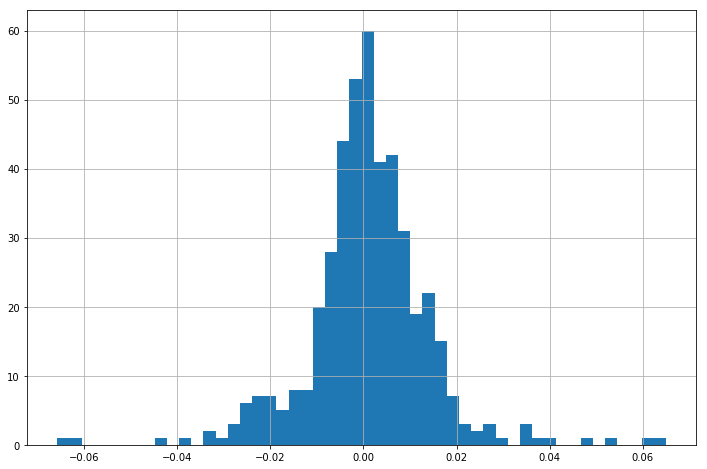

In [80]:
# plot daily percentage change values histogram for AAPL using 50 bins
aapl_pct = daily_pct_change['AAPL']
aapl_pct.hist(bins=50, figsize=(12,8))
#plt.savefig('aapl percentage change histogram.png')

In [81]:
# get descriptive statistics
aapl_pct.describe()

count    4.510e+02
mean     1.088e-03
std      1.317e-02
min     -6.571e-02
25%     -4.714e-03
50%      8.969e-04
75%      7.445e-03
max      6.496e-02
Name: AAPL, dtype: float64

In [83]:
aapl_pct.describe(percentiles=[0.025, 0.5, 0.975])

count    4.510e+02
mean     1.088e-03
std      1.317e-02
min     -6.571e-02
2.5%    -2.555e-02
50%      8.969e-04
97.5%    2.711e-02
max      6.496e-02
Name: AAPL, dtype: float64

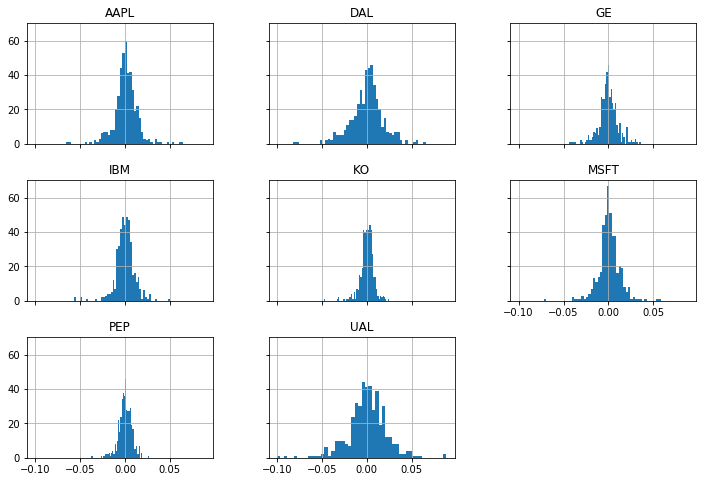

In [87]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, sharey = True, figsize=(12,8))
#plt.savefig('cumulative return histograms.png', dpi=300)

### QQ-Plot
a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.[1] First, the set of intervals for the quantiles is chosen. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the number of the interval for the quantile.

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x. If the distributions are linearly related, the points in the Q–Q plot will approximately lie on a line, but not necessarily on the line y = x. Q–Q plots can also be used as a graphical means of estimating parameters in a location-scale family of distributions.

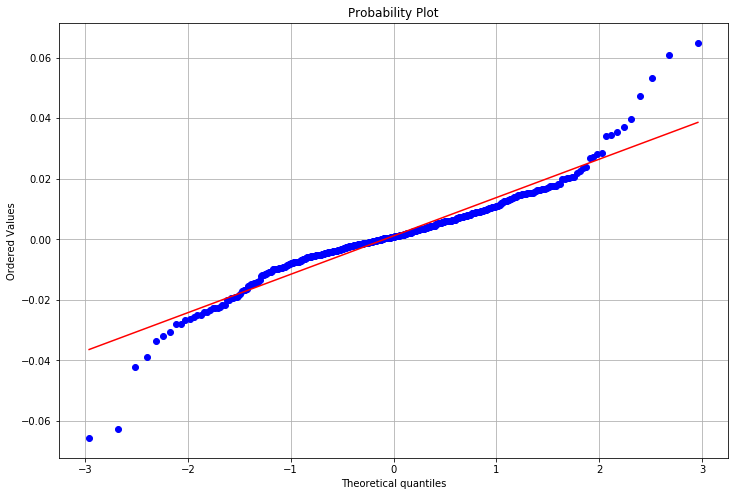

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


In [105]:
# create a qq-plot of AAPL returns vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)  # "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
# .add_subplot(221) top left,  .add_subplot(222) top right, .add_subplot(223)  bottom left, fig.add_subplot(224) bottom right 

stats.probplot(aapl_pct, dist='norm', plot=ax)
plt.grid()
plt.show()
#plt.savefig('aapl daily percent change QQ plot.png')
#print(type(f))
#print(type(ax))

### Box and whisker plots
https://en.wikipedia.org/wiki/Box_plot
https://baike.baidu.com/item/箱形图/10671164?fromtitle=箱线图&fromid=10101649

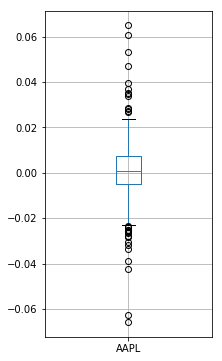

In [98]:
# create a box and whisker for the AAPL daily percent change returns
aapl_pct.plot(kind='box', figsize=(3,6))
plt.grid()
#plt.savefig('aapl box and whisker plot.png')

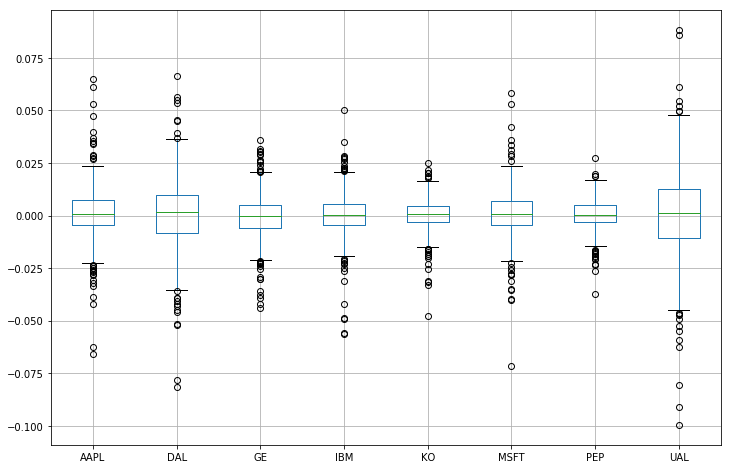

In [288]:
# all the returns
daily_pct_change.plot(kind='box', figsize=(12,8))
plt.grid()
#plt.savefig('all daily percent change box.png')

### Comparison of daily percentage change between stocks

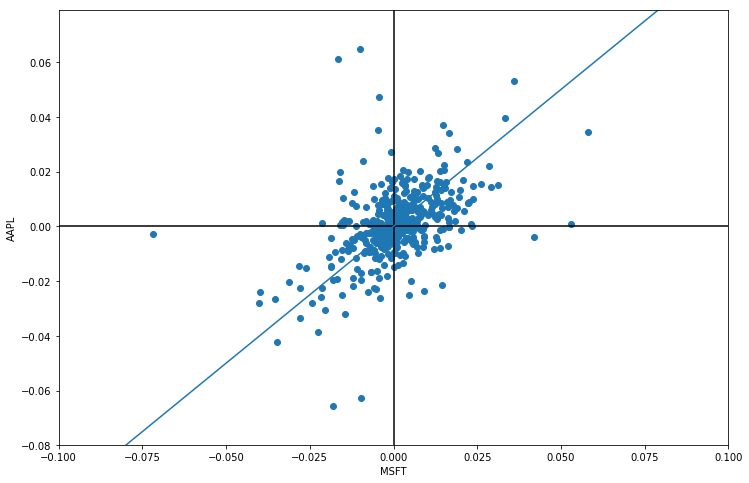

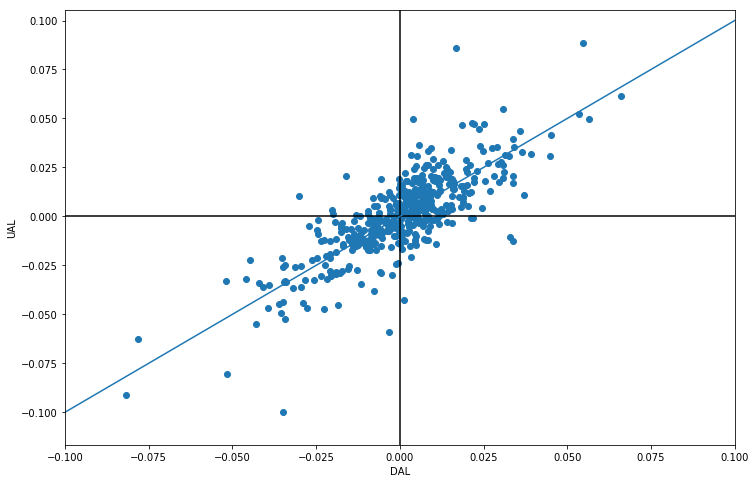

In [267]:
def render_scatter_plot(data, x_stock, y_stock, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock], data[y_stock])
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.autoscale(False)
    # h and v lines at 0
    ax.hlines(0, -5, 5)
    ax.vlines(0, -5, 5)
    # y = x line would be perfect correlation
    ax.plot((-5, 5), (-5, 5))  # plot([0, 1], [0, 1])  plot a line from (0, 0) to (1, 1)
    # label axes
    ax.set_xlabel(x_stock)
    ax.set_ylabel(y_stock)
    
# MSFT VS AAPL
limits = [-0.1, 0.1]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)
#plt.savefig('msft vs apple daily percentage chage.png')
render_scatter_plot(daily_pct_change, 'DAL', 'UAL',xlim=limits)

### KDE plot
kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.
https://baike.baidu.com/item/核密度估计

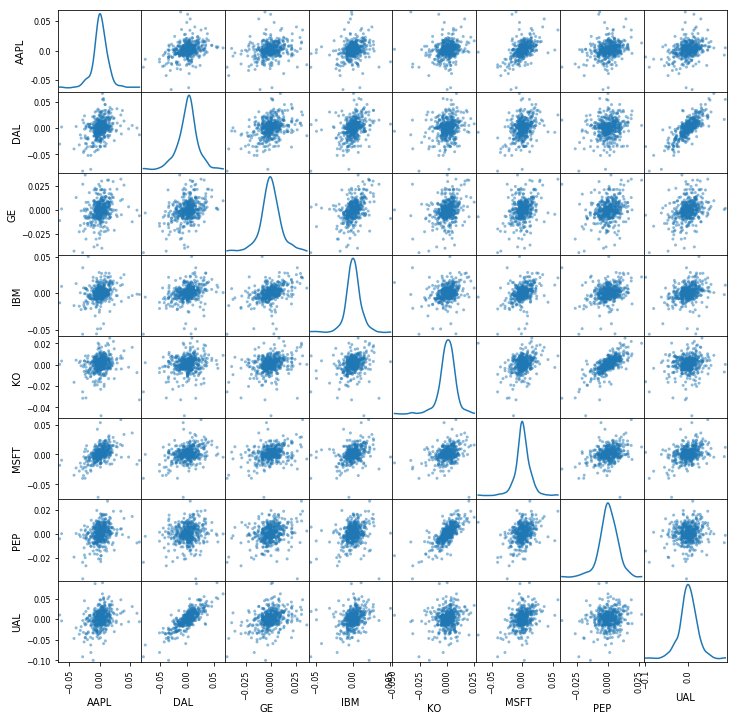

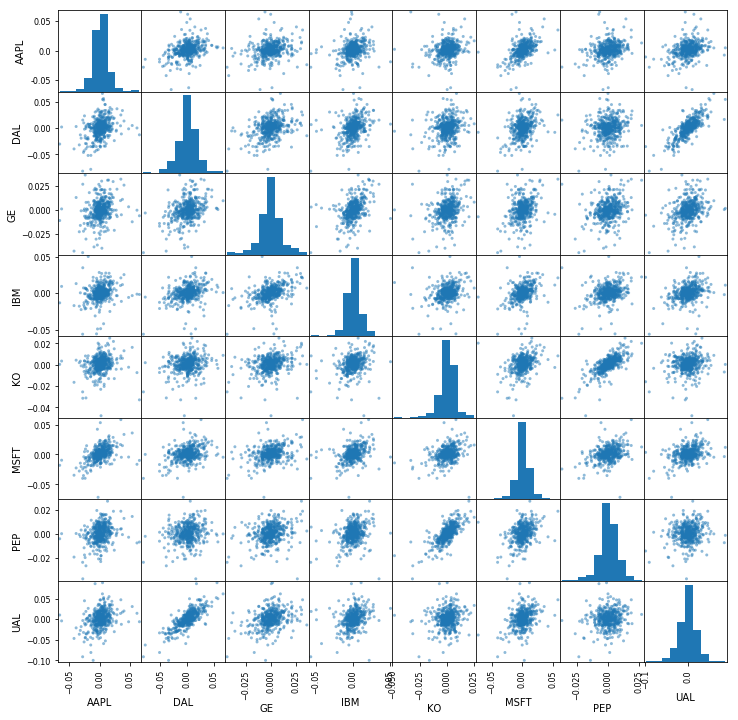

In [128]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal = 'kde', figsize=(12,12))
#plt.savefig('all stocks with kde.png', dpi=300)
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal = 'hist', figsize=(12,12))
#plt.savefig('all stocks with hist.png', dpi=300)

### Moving windows

Date
2016-01-04    101.791
2016-01-05     99.240
2016-01-06     97.298
2016-01-07     93.191
2016-01-08     93.684
               ...   
2016-12-23    115.088
2016-12-27    115.819
2016-12-28    115.325
2016-12-29    115.296
2016-12-30    114.397
Name: Adj Close, Length: 252, dtype: float64


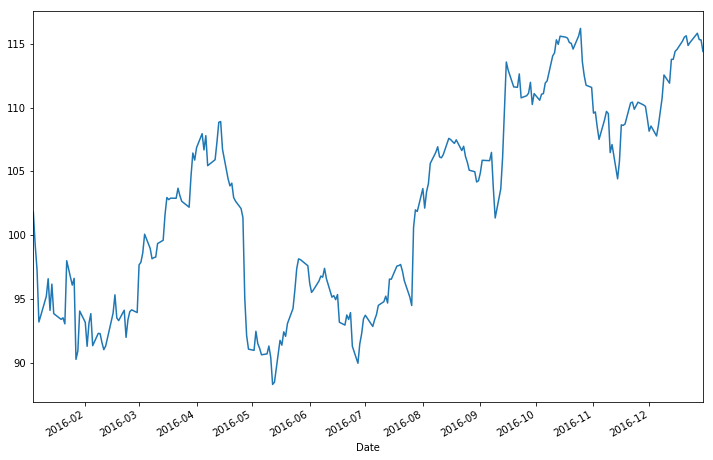

In [152]:
aapl = all_data.loc['AAPL'].loc['2016-01-01':'2016-12-31']
sample = aapl['Adj Close']
print(sample)
sample.plot(figsize=(12,8))

Date
2016-01-04        NaN
2016-01-05        NaN
2016-01-06        NaN
2016-01-07        NaN
2016-01-08     97.041
               ...   
2016-12-23    115.258
2016-12-27    115.381
2016-12-28    115.343
2016-12-29    115.278
2016-12-30    115.185
Name: Adj Close, Length: 252, dtype: float64


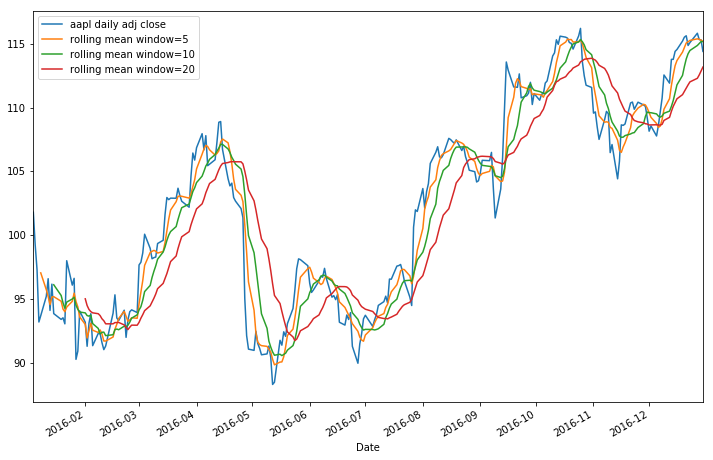

In [161]:
#pd.rolling_mean(sample, 5).plot(figsize=(12,8))
rolling_mean = pd.Series.rolling(sample, window=5).mean()
print(rolling_mean)
sample.plot(figsize=(12,8), label = 'aapl daily adj close')
rolling_mean.plot(figsize=(12,8), label = 'rolling mean window=5')
pd.Series.rolling(sample, window=10).mean().plot(figsize=(12,8), label='rolling mean window=10')
pd.Series.rolling(sample, 20).mean().plot(figsize=(12,8), label='rolling mean window=20')
plt.legend()
#plt.savefig('aapl rolling window mean.png', dpi=300)

Date
2016-01-04      NaN
2016-01-05      NaN
2016-01-06      NaN
2016-01-07      NaN
2016-01-08    2.882
              ...  
2016-12-23    0.247
2016-12-27    0.325
2016-12-28    0.302
2016-12-29    0.243
2016-12-30    0.354
Name: Adj Close, Length: 252, dtype: float64


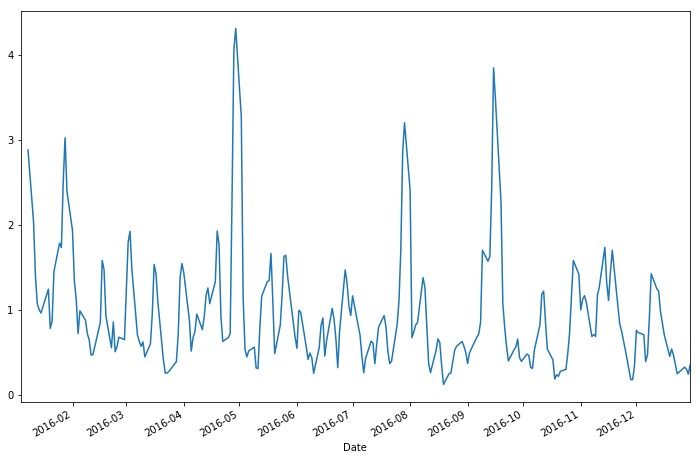

In [185]:
mean_abs_dev = lambda x: np.fabs(x-x.mean()).mean() # np.fabs() absolute values 绝对值
_ = pd.Series.rolling(sample, 5).apply(mean_abs_dev)
print(_)
_.plot(figsize=(12,8))
#plt.savefig('mean absolute.png')

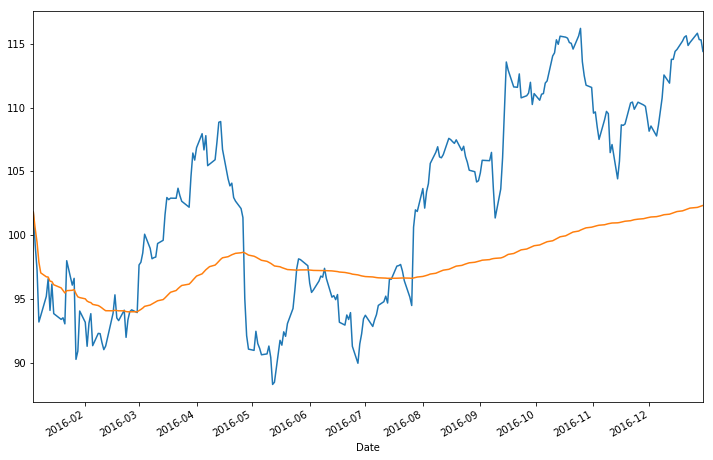

In [186]:
expanding_mean = lambda x: pd.Series.rolling(x, window=len(x), min_periods=1).mean()
sample.plot()
expanding_mean(sample).plot(figsize=(12,8))
#plt.savefig('expanding mean.png')

### Volatility calculation

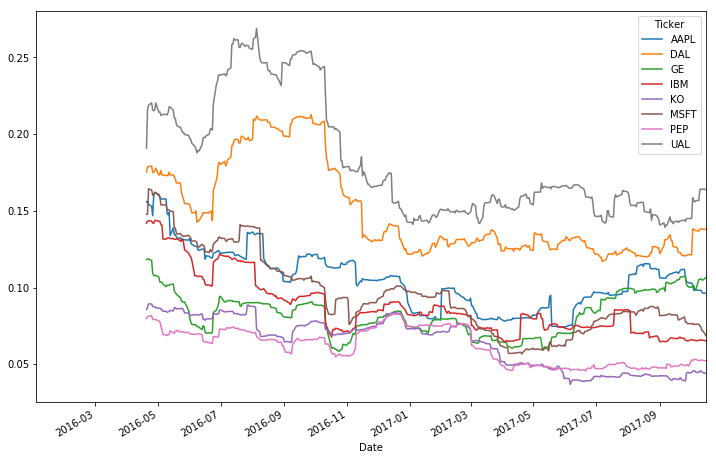

In [189]:
# a minimum of 75 days
min_periods = 75
# calculate the rolling standard deviation
vol = pd.Series.rolling(daily_pct_change, min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(12,8))
#plt.savefig('volatility.png')

### Rolling correlation of returns

Date
2016-12-30    0.495
2017-01-03    0.495
2017-01-04    0.500
2017-01-05    0.496
2017-01-06    0.482
              ...  
2017-10-10    0.456
2017-10-11    0.459
2017-10-12    0.458
2017-10-13    0.458
2017-10-16    0.456
Length: 200, dtype: float64


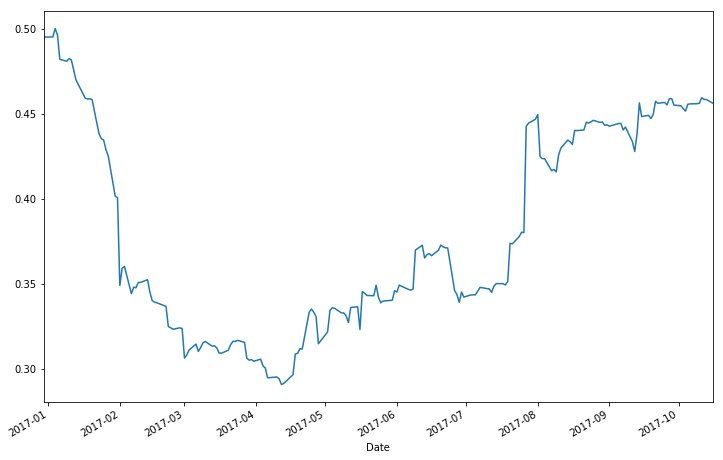

In [195]:
# one year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = pd.Series.rolling(daily_pct_change['AAPL'], window=252).corr( daily_pct_change['MSFT']).dropna()
#rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'], daily_pct_change['MSFT'], window=252)
print(rolling_corr)
rolling_corr.plot(figsize=(12,8))
plt.savefig('252 days rolling correlation of aapl and msft.png')

### Least squares regression of returns : OLS（ordinary least square）

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     65.79
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           8.92e-26
Time:                        02:36:32   Log-Likelihood:                 1371.5
No. Observations:                 451   AIC:                            -2737.
Df Residuals:                     448   BIC:                            -2725.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.001      1.042      0.2

/Users/mandy/anaconda3/lib/python3.6/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)


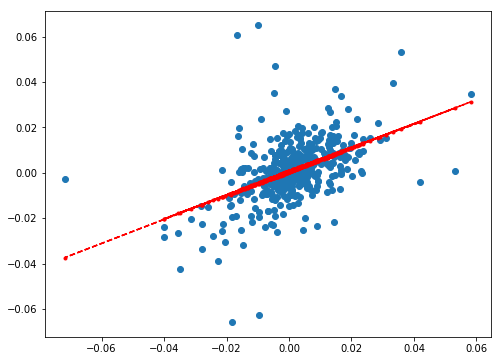

In [223]:
# least squares on the returns of aapl and msft
'''https://zhuanlan.zhihu.com/p/22692029
http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
有问题，未解决'''

import statsmodels.formula.api as sm
x = daily_pct_change['MSFT']
y = daily_pct_change['AAPL']
err = np.random.normal(size=len(x))
model = sm.ols(formula = 'y ~ x+err', data = x)
result = model.fit()
print(result.summary())
y_fitted = result.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.', label = 'OLS')

# model = pd.ols(y=daily_pct_change['AAPL], x={'MSFT': daily_pct_change['MSFT']}, window=250)
#model

#model.beta[:5]
#model.beta['MSFT'].plot()

### Comparing stocks to the S&P 500

In [228]:
# get daily s&p 500 info
sp_500 = data.DataReader('^GSPC', 'yahoo', start, end)
print(sp_500[:5])
# calculate the pct change on the close for s&p 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

               Open     High      Low    Close  Adj Close      Volume
Date                                                                 
2016-01-04  2038.20  2038.20  1989.68  2012.66    2012.66  4304880000
2016-01-05  2013.78  2021.94  2004.17  2016.71    2016.71  3706620000
2016-01-06  2011.71  2011.71  1979.05  1990.26    1990.26  4336660000
2016-01-07  1985.32  1985.32  1938.83  1943.09    1943.09  5076590000
2016-01-08  1945.97  1960.40  1918.46  1922.03    1922.03  4664940000


Date
2016-01-04    0.000
2016-01-05    0.002
2016-01-06   -0.013
2016-01-07   -0.024
2016-01-08   -0.011
Name: Adj Close, dtype: float64

In [235]:
# concat the s&p 500 daily change with other daily pct values
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis = 1) # axis=1  以列为单位合并 
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all

                SP500       AAPL        DAL  ...     MSFT        PEP    UAL
Date                                         ...                           
2016-01-04  0.000e+00  0.000e+00  0.000e+00  ...    0.000  0.000e+00  0.000
2016-01-05  2.012e-03 -2.506e-02 -1.850e-03  ...    0.005  6.885e-03 -0.010
2016-01-06 -1.312e-02 -1.957e-02  7.412e-03  ...   -0.018  3.018e-04  0.003
2016-01-07 -2.370e-02 -4.220e-02 -3.944e-02  ...   -0.035 -1.920e-02 -0.047
2016-01-08 -1.084e-02  5.288e-03 -8.298e-03  ...    0.003 -3.690e-03 -0.014
...               ...        ...        ...  ...      ...        ...    ...
2017-10-10  2.322e-03  3.850e-04  1.855e-02  ...    0.000  6.999e-03  0.047
2017-10-11  1.804e-03  4.169e-03  7.021e-03  ...    0.002  6.590e-03 -0.005
2017-10-12 -1.687e-03 -3.513e-03  7.537e-04  ...    0.009  8.430e-03 -0.011
2017-10-13  8.781e-04  6.346e-03  1.600e-02  ...    0.005  1.512e-03  0.014
2017-10-16  1.751e-03  1.841e-02 -6.301e-03  ...    0.002  8.435e-03 -0.009

[451 rows x

In [236]:
# calculate the cumulative for all the daily data
cdr_all = (1+dpc_all).cumprod()
cdr_all

            SP500   AAPL    DAL  ...     MSFT    PEP    UAL
Date                             ...                       
2016-01-04  1.000  1.000  1.000  ...    1.000  1.000  1.000
2016-01-05  1.002  0.975  0.998  ...    1.005  1.007  0.990
2016-01-06  0.989  0.956  1.006  ...    0.986  1.007  0.993
2016-01-07  0.965  0.916  0.966  ...    0.952  0.988  0.946
2016-01-08  0.955  0.920  0.958  ...    0.955  0.984  0.933
...           ...    ...    ...  ...      ...    ...    ...
2017-10-10  1.267  1.532  1.117  ...    1.455  1.179  1.218
2017-10-11  1.270  1.538  1.125  ...    1.457  1.186  1.212
2017-10-12  1.267  1.533  1.126  ...    1.471  1.196  1.198
2017-10-13  1.269  1.542  1.144  ...    1.478  1.198  1.215
2017-10-16  1.271  1.571  1.137  ...    1.481  1.208  1.204

[451 rows x 9 columns]

In [237]:
# calculate correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500   AAPL    DAL  ...     MSFT    PEP    UAL
SP500  1.000  0.555  0.580  ...    0.693  0.455  0.538
AAPL   0.555  1.000  0.329  ...    0.476  0.265  0.315
DAL    0.580  0.329  1.000  ...    0.334  0.169  0.795
GE     0.621  0.248  0.369  ...    0.329  0.267  0.341
IBM    0.548  0.224  0.328  ...    0.358  0.271  0.314
KO     0.445  0.178  0.201  ...    0.345  0.737  0.159
MSFT   0.693  0.476  0.334  ...    1.000  0.360  0.369
PEP    0.455  0.265  0.169  ...    0.360  1.000  0.146
UAL    0.538  0.315  0.795  ...    0.369  0.146  1.000

[9 rows x 9 columns]

In [238]:
# how well did each stock relate to the s&p 500
dpc_corrs['SP500']

SP500    1.000
AAPL     0.555
DAL      0.580
GE       0.621
IBM      0.548
KO       0.445
MSFT     0.693
PEP      0.455
UAL      0.538
Name: SP500, dtype: float64

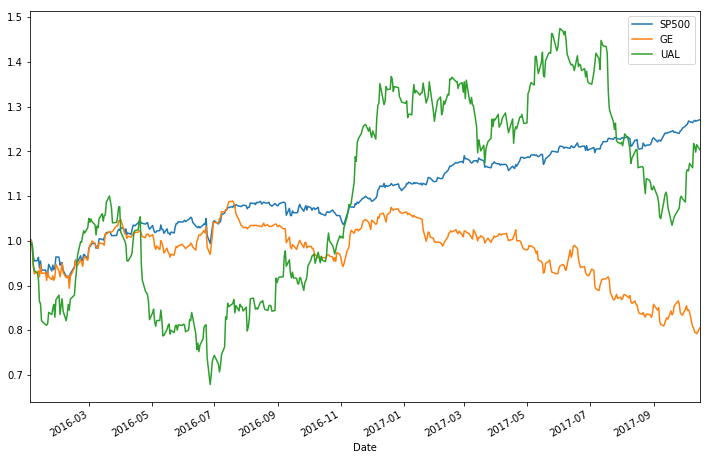

In [239]:
# plot GE and UAL against sp500
cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8))
#plt.savefig('cumulative daily returns sp500.png')

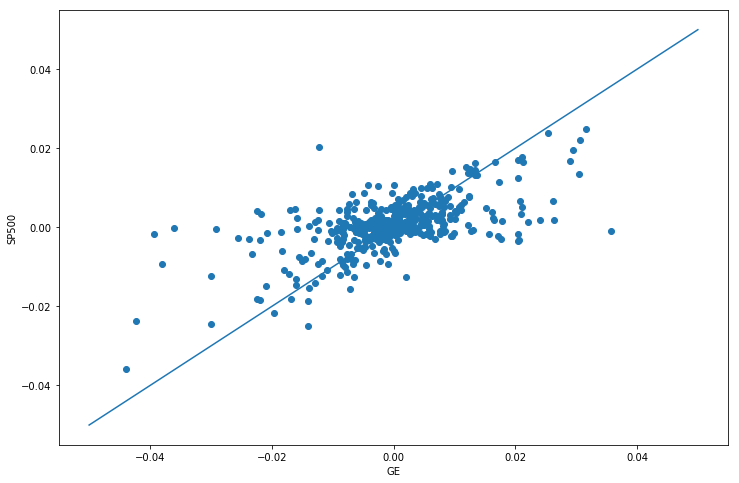

In [274]:
# GE VS SP500
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(dpc_all['GE'], dpc_all['SP500'])
ax.plot((-0.05,0.05), (-0.05, 0.05))
ax.set_xlabel('GE')
ax.set_ylabel("SP500")
#line1 = [(-0.05, -0.05), (0.05, 0.055)]
#(line1_xs, line1_ys) = zip(*line1)
#from matplotlib.lines import Line2D
#ax.add_line(Line2D(line1_xs, line1_ys, linewidth=1, color='r'))

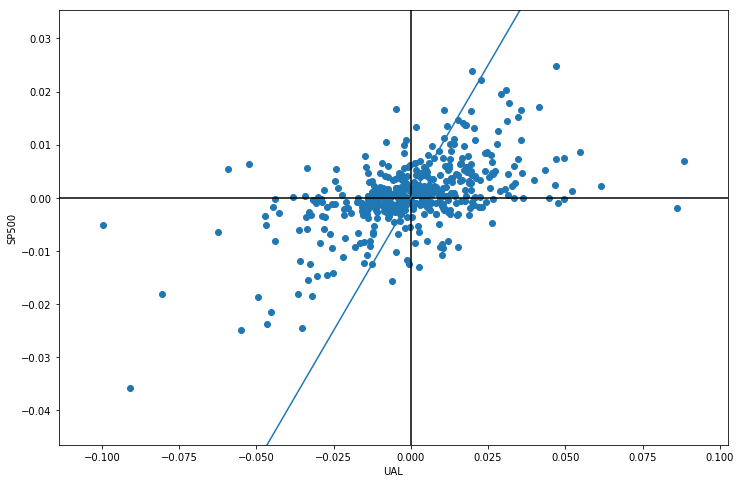

In [263]:
# UAL VS SP500
render_scatter_plot(dpc_all, 'UAL', 'SP500')

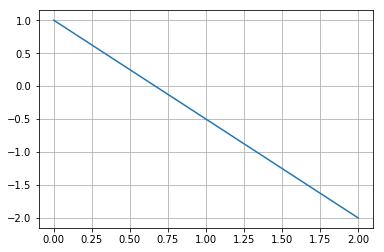

In [292]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot((0,2), (1, -2))
ax.grid()

ImportError: cannot import name 'ols'